#### Обработка данных

In [1]:
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go

from scipy import optimize as opt 
import scipy
import scipy.odr as odr

from statsmodels.stats.weightstats import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [74]:
data_1 = pd.read_csv('data/experiment_1.csv') # Считываем данные
data_2 = pd.read_csv('data/experiment_2.csv')

In [3]:
data_1

,m,nu_1,nu_2,nu_3
0,-2,66,60,67
1,-1,34,38,30
2,0,-2,6,5
3,1,-29,-19,-30
4,2,-50,-46,-56


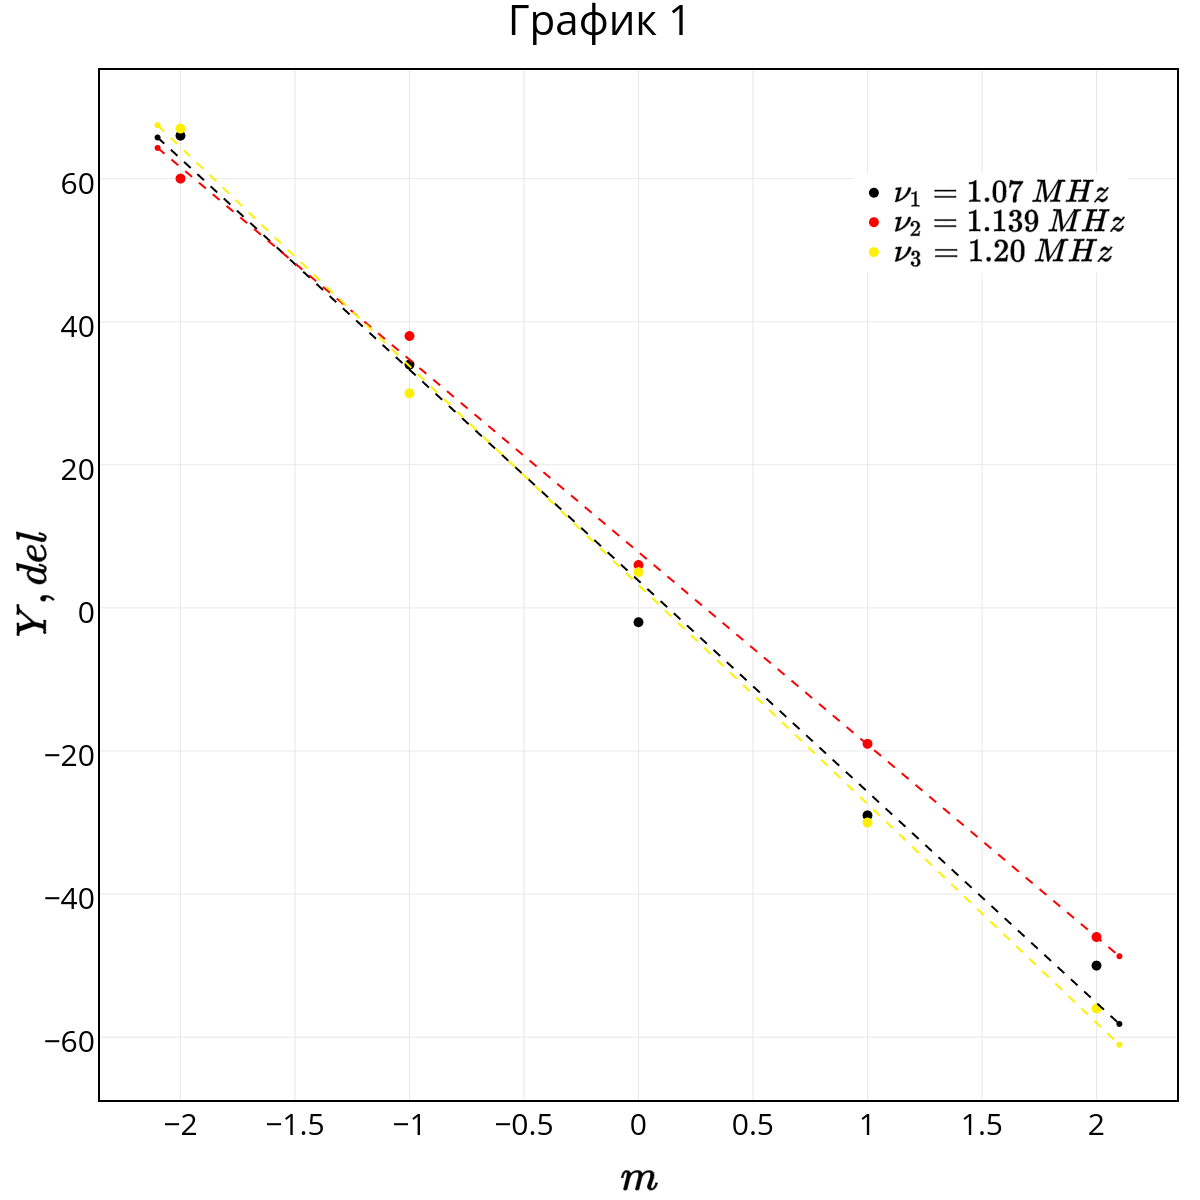

In [91]:
trace1 = go.Scatter(
    y = data_1['nu_1'],
    x = data_1['m'],
    mode = 'markers',
    name = '$ν_1 = 1.07~MHz$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
    error_y = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    )
)
trace2 = go.Scatter(
    y = data_1['nu_2'],
    x = data_1['m'],
    mode = 'markers',
    name = '$ν_2 = 1.139~MHz$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#ff0000'
    ),
    error_y = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    )
)
trace3 = go.Scatter(
    y = data_1['nu_3'],
    x = data_1['m'],
    mode = 'markers',
    name = '$ν_3 = 1.20~MHz$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#fff000'
    ),
    error_y = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.01,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    )
)

trace1a = go.Scatter(
    x = [-2.1, 2.1],
    y = [3.8 - 29.5 * (-2.1), 3.8 - 29.5 * (2.1)],
    line = dict(
        color = ('#000000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace2a = go.Scatter(
    x = [-2.1, 2.1],
    y = [7.80000001 - 26.9 * (-2.1), 7.80000001 - 26.9 * (2.1)],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace3a = go.Scatter(
    x = [-2.1, 2.1],
    y = [3.2 - 30.6 * (-2.1), 3.2 - 30.6 * (2.1)],
    line = dict(
        color = ('#fff000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2, trace3, trace1a, trace2a, trace3a]

layout = go.Layout(
    showlegend=True,
    legend=dict(
        x=0.7,
        y=0.9
        #orientation= "h"
    ),
    title = "График 1",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$m$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$Y, del$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 100,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

In [9]:
Y = np.reshape(np.array(data_1['nu_1']), (1, len(np.array(data_1['nu_1']))))
X = np.reshape(np.array(data_1['m']), (1, len(np.array(data_1['m']))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print parameters_opt_1
print np.sqrt(np.diag(parameters_cov_1))

[-29.5   3.8]
[ 1.6563011   2.34236358]


In [10]:
Y = np.reshape(np.array(data_1['nu_2']), (1, len(np.array(data_1['nu_2']))))
X = np.reshape(np.array(data_1['m']), (1, len(np.array(data_1['m']))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print parameters_opt_1
print np.sqrt(np.diag(parameters_cov_1))

[-26.9          7.80000001]
[ 0.74610097  1.0551461 ]


In [13]:
Y = np.reshape(np.array(data_1['nu_3']), (1, len(np.array(data_1['nu_3']))))
X = np.reshape(np.array(data_1['m']), (1, len(np.array(data_1['m']))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print parameters_opt_1
print np.sqrt(np.diag(parameters_cov_1))

[-30.6   3.2]
[ 1.08320513  1.53188333]


In [17]:
# 1
29.5 * 4

118.0

In [18]:
# 1
26.9 * 4

107.6

In [19]:
# 1
30.6 * 4

122.4

In [24]:
# 1
print 10**(6.0) / (29.5 * 4) * 0.28 * 6400 * 10**(-10.0)
print 10**(6.0) / (29.5 * 4) * 0.28 * 6400 * 10**(-10.0) * 10**(6) * 1.07

0.0015186440678
1624.94915254


In [25]:
# 2
print 10**(6.0) / (26.9 * 4) * 0.28 * 6400 * 10**(-10.0)
print 10**(6.0) / (26.9 * 4) * 0.28 * 6400 * 10**(-10.0) * 10**(6) * 1.139

0.00166542750929
1896.92193309


In [26]:
# 3
print 10**(6.0) / (30.6 * 4) * 0.28 * 6400 * 10**(-10.0)
print 10**(6.0) / (30.6 * 4) * 0.28 * 6400 * 10**(-10.0) * 10**(6) * 1.2

0.00146405228758
1756.8627451


In [27]:
print (1624.94915254 + 1896.92193309 + 1756.8627451) / 3

1759.57794358


In [47]:
print (data_2['x_2'] - data_2['x_1']) * 10**(-3) / (2.31 - 1.82) / data_2['n'] * 2

0    0.002041
1    0.001939
2    0.001293
3    0.001361
4    0.001293
dtype: float64


In [49]:
data_2['nu']

0    1.43
1    1.56
2    1.71
3    1.78
4    1.88
Name: nu, dtype: float64

In [54]:
0.001293 * 1.88 * 10**(6)

2430.84

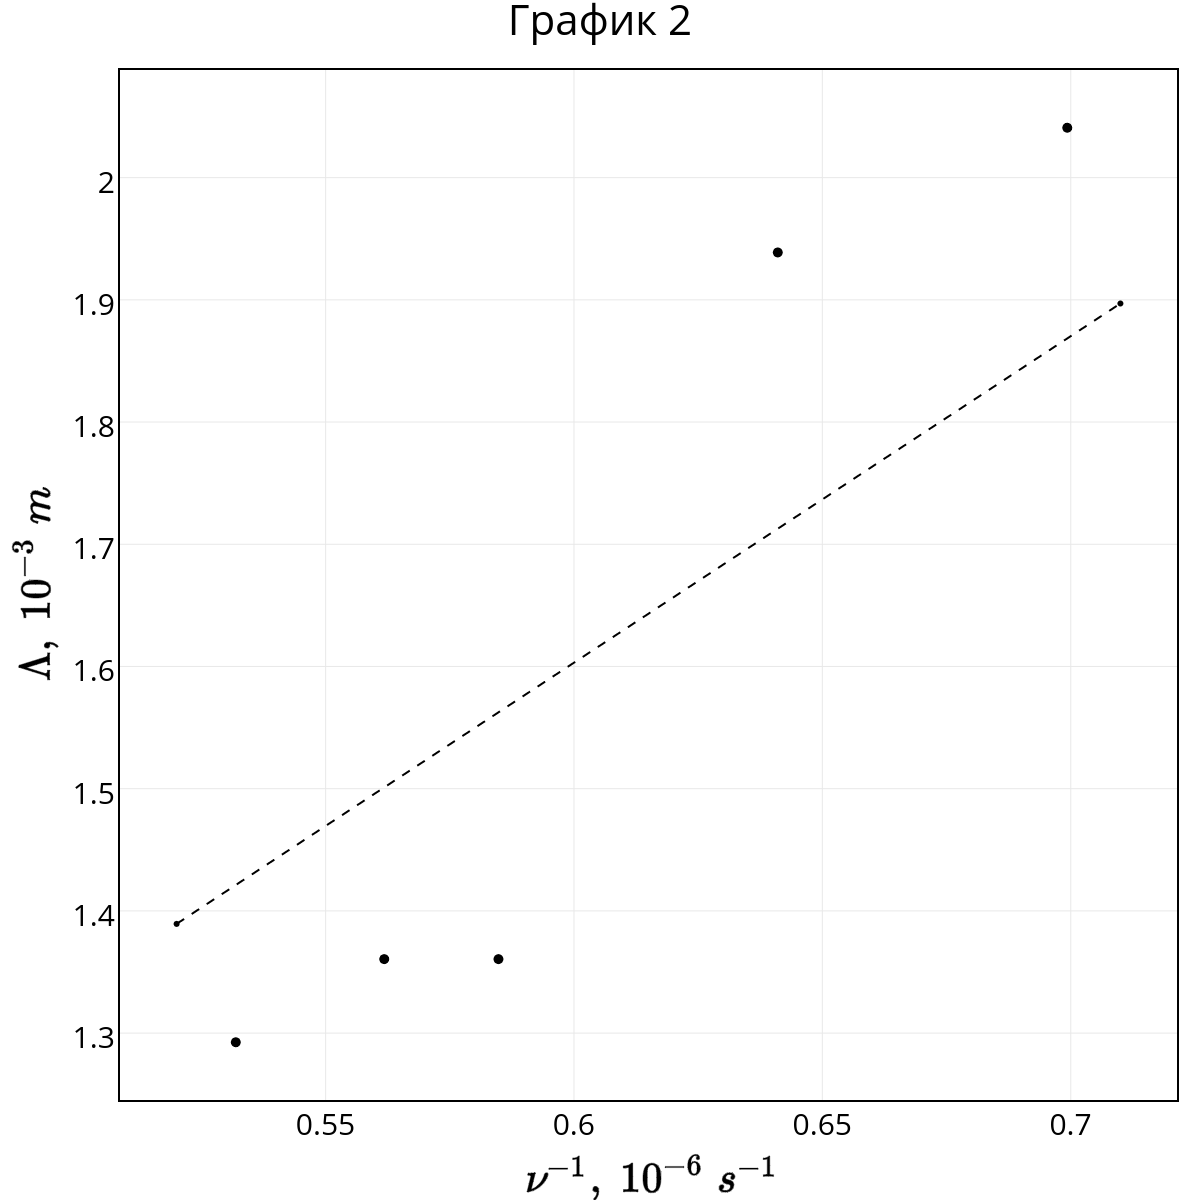

In [89]:
trace1 = go.Scatter(
    x = 1 / data_2['nu'] ,
    y = L * 1000,
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type='constant',
        value=0,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type='constant',
        value=0,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
)

trace1a = go.Scatter(
    x = [0.52, 0.71],
    y = [0.00267184 * (0.52) * 1000, 0.00267184 * (0.71) * 1000],
    line = dict(
        color = ('#000000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)


trace0 = [trace1, trace1a]

layout = go.Layout(
    showlegend=False,
    legend=dict(
        #x=0.9,
        #y=1
        orientation= "h"
    ),
    title = "График 2",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$ν^{-1},~10^{-6}~s^{-1}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\Lambda,~10^{-3}~m$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)

In [81]:
Y = np.reshape(np.array(L), (1, len(np.array(L))))
X = np.reshape(np.array(1 / data_2['nu']), (1, len(np.array(1 / data_2['nu']))))
def f(x, b):
    return b*x
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print parameters_opt_1
print np.sqrt(np.diag(parameters_cov_1))

[ 0.00267184]
[ 0.00014645]


In [87]:
0.00267184 * 10**(6)

2671.84